## Keyphrase extraction from sociology papers
This notebook contains the efforts to extract crucial n-grams identifying the concept of Nation from some sociology papers published between the end of the 20th century and the beginning of the 21st century. The papers are in French (11 papers) and in German (4 papers)

In [1]:
# imports
import pandas as pd
import glob
from nltk.corpus import stopwords
import nltk 
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import spacy

In [10]:
#loading the data
french_txt = []
for file in glob.glob("data2/french*.txt"):
    print(file)
    french_txt.append(open(file, "r", encoding='utf8').read())
    
german_txt = []

for file in glob.glob("data2/german*.txt"):
    german_txt.append(open(file, "r", encoding='utf8').read())
    
print(len(french_txt), len(german_txt))

data2\french-Babadzan.txt
data2\french-DIECKHOFF.txt
data2\french-gellner.txt
data2\french-GODECHOT.txt
data2\french-Hermet.txt
data2\french-Ipperciel-2.txt
data2\french-Ipperciel.txt
data2\french-Ledermann.txt
data2\french-racisme.txt
data2\french-renans-rev.txt
data2\french-swiss-nationality.txt
11 4


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
#loading the data
french_baseline = []
for file in glob.glob("baseline_sociology/french*.txt"):
    french_baseline.append(open(file, "r", encoding='utf8').read())
    
german_baseline = []

for file in glob.glob("baseline_sociology/german*.txt"):
    german_baseline.append(open(file, "r", encoding='utf8').read())
    
print(len(french_baseline), len(german_baseline))

11 4


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Preprocessing
- punctuation removal
- stopword removal
- (OPTIONAL) language filtering
- lemmatization
- part-of-speech tagging filtering

In [4]:
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())
#text_vocab = set(w.lower() for w in ' '.join(french_txt+german_txt).split() if w.lower().isalpha())
#unusual = text_vocab.intersection(english_vocab)
#unusual.add('cookies')
#len(unusual)

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#! python -m spacy download de_core_news_sm
#! python -m spacy download fr_core_news_sm

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
pos_to_keep = ['ADJ', 'ADV', 'NOUN', 'PROPN', 'VERB']

french_txt_sw = []
french_baseline_sw = []

tokenizer = nltk.RegexpTokenizer(r"\w+")

#load spacy corpuses
nlp_de = spacy.load('de_core_news_sm')
nlp_fr = spacy.load('fr_core_news_sm')

def lematization_pos_tagging(tagging_language_funtion, text):
    doc = tagging_language_funtion(text)
    lemmatized = [x.lemma_ for x in doc if x.pos_ in pos_to_keep and x.is_stop != True]
    return lemmatized

for i in range(len(french_txt)):
    print(i)
    if len(french_txt[i])< 100000:
        text_tokens = lematization_pos_tagging(nlp_fr, french_txt[i])
    else:
        text_tokens = lematization_pos_tagging(nlp_fr, french_txt[i][:99999])
    french_txt_sw.append(' '.join(text_tokens))
    text_tokens = lematization_pos_tagging(nlp_fr, french_baseline[i])
    french_baseline_sw.append(' '.join(text_tokens))
    
        
    
german_txt_sw = []
german_baseline_sw = []

for i in range(len(german_txt)):
    print(i)
    text_tokens = lematization_pos_tagging(nlp_de, german_txt[i])
    german_txt_sw.append(' '.join(text_tokens))
    text_tokens = lematization_pos_tagging(nlp_de, german_baseline[i])
    german_baseline_sw.append(' '.join(text_tokens))
    
print(french_txt_sw[0][:20], '\n', german_txt_sw[0][:20])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
invention tradition  
 Nationalismus Nation


In [32]:
str_french = ' '.join(french_txt_sw)
french = french_baseline_sw + [str_french]
len(french)
str_german = ' '.join(german_txt_sw)
german = german_baseline_sw + [str_german]
len(german)

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5

In [33]:
len(french[11])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


378484

for the future: stemming part of speech tagging and do with adjectives more texts more preprocessing in general LDA

### Frequent n-gram extraction

In [34]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(french[:12])
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==11]
swiss_tfidf= swiss_tfidf.T.sort_values(by=11, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:100])

['nationalisme', 'nationalité', 'nation', 'racisme', 'suisse', 'convention', 'droit', 'etat', 'national', 'politique', 'patrie', 'anderson', 'smith', 'culture', 'tradition', 'culturel', 'peuple', 'nationaliste', 'hobsbawm', 'voir', 'naturalisation', 'nairn', 'habermas', 'nationaliter', 'social', 'nationalism', 'langue', 'moderne', 'europe', 'patriote', 'gellner', 'renan', 'homme', 'mot', 'principe', 'phénomène', 'linguistique', 'art', 'question', 'citoyen', 'pouvoir', 'rapport', 'patriotisme', 'naim', 'public', 'sens', 'théoricien', 'inventer', 'sentiment', 'cas', 'théorie', 'grand', 'raison', 'populaire', 'également', 'état', 'société', 'communauté', 'lien', 'général', 'pays', 'européen', 'fédéral', 'individu', 'ethnique', 'étude', 'unité', 'chapitre', 'forme', 'romand', 'alémanique', 'faire', 'nouveau', 'auteur', 'idée', 'siècle', 'mettre', 'empire', 'canton', 'identité', 'définition', 'ensemble', 'origine', 'international', 'débat', 'travail', 'français', 'souveraineté', 'populisme'

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(german)
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==4]
swiss_tfidf=swiss_tfidf.T.sort_values(by=4, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:100])

['nation', 'nationalstaat', 'deutsch', 'nationalismus', 'national', 'europa', 'politisch', 'schweiz', 'staat', 'österreich', 'revolution', 'deutschland', 'jahrhundert', 'volk', 'nationsbildung', '19', 'geschichte', 'politische', 'reich', 'jahn', 'einheit', 'sängerbewegung', 'entstehen', 'krieg', 'schwäbisch', 'fremde', 'frankreich', 'europäisch', 'kulturell', 'gesellschaft', 'preuße', 'idee', 'deutsche', 'leben', 'bund', 'turnbewegung', 'lassen', 'modern', 'schweizer', 'alt', 'verein', 'turner', 'grenze', 'land', 'bewegung', 'müssen', 'gemeinsam', 'bilden', 'bleiben', 'ziel', 'nationalbewegung', 'stadt', 'gelten', 'zeigen', 'gehören', 'fest', 'schaffen', 'historisch', 'entwicklung', 'staatlich', 'preußisch', 'sprechen', 'sozial', 'mitglied', 'kraft', 'mensch', 'zuvor', 'gott', 'prozeß', 'territorium', 'militärisch', 'sänger', 'stark', 'stellen', 'tragen', 'kampf', 'weltkrieg', 'gegenwart', 'neu', 'nennen', 'bestimmen', 'religiös', 'vergangenheit', 'vorstellung', 'stehen', 'europäische'

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
vectorizer = TfidfVectorizer(ngram_range=(2,4))
X = vectorizer.fit_transform(french[:12])
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==11]
swiss_tfidf= swiss_tfidf.T.sort_values(by=11, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:200])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['racisme nationalisme', 'droit nationalité', 'théorie nationalisme', 'convention nationalité', 'théoricien nationalisme', 'tradition inventer', 'convention européen', 'droit homme', 'art convention', 'mot patrie', 'nationalisme racisme', 'articulation racisme nationalisme', 'articulation racisme', 'lien racisme', 'européen nationalité', 'invention tradition', 'convention européen nationalité', 'lien racisme nationalisme', 'rapport explicatif convention', 'nationalité droit', 'rapport explicatif', 'rapport explicatif convention européen', 'art let', 'naturalisation ordinaire', 'explicatif convention européen', 'explicatif convention', 'nationalité numéro', 'mot nation', 'nation moderne', 'droit international', 'européen nationalité numéro', 'convention européen nationalité numéro', 'relation racisme', 'droit fondamental', 'anthony smith', 'explicatif convention européen nationalité', 'espace public', 'art let convention nationalité', 'relation racisme nationalisme', 'batiffol henri', '

In [37]:
vectorizer = TfidfVectorizer(ngram_range=(2,4))
X = vectorizer.fit_transform(german)
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==4]
swiss_tfidf=swiss_tfidf.T.sort_values(by=4, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:200])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['deutsch nation', '19 jahrhundert', 'deutsch nationalstaat', 'deutsche bund', 'deutsch staat', 'nation nationalstaat', 'deutsch geschichte', 'hälfte 19 jahrhundert', 'modern nationalismus', 'hälfte 19', 'schwäbisch sängerbewegung', 'deutsch nationalbewegung', '18 jahrhundert', 'prozeß nationsbildung', 'idee nation', 'schwäbische sängerbewegung', 'national bewegung', 'modern nation', '20 jahrhundert', 'französische revolution', 'alte reich', 'deutsch sängerbewegung', 'schwäbisch sängerbund', 'schwäbische sängerbundes', 'deutsch volk', 'spät 18', 'idee deutsch', 'partizipation aggression', 'kleindeutschen nationalstaat', 'staat gesellschaft', 'otto elben', '19 20', 'sozial bewegung', 'karl pfaff', 'frage stellen', 'mehrheits minderheitenspannungen', 'deutsch kulturnation', 'einzeln staat', 'deutsch nationalismus', 'gründung nationalstaat', 'nation nationalismus', '19 20 jahrhundert', 'innen außen', 'staat deutsche', 'spät 18 jahrhundert', 'weimarer republik', 'europäisch staat', 'deutsc

In [22]:
# only swiss vs general nationality          
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(french_txt_sw[:11])
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==10]
swiss_tfidf= swiss_tfidf.T.sort_values(by=10, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:100])

['nationalité', 'convention', 'droit', 'etat', 'art', 'naturalisation', 'suisse', 'nationaliter', 'numéro', 'international', 'voir', 'infra', 'fédéral', 'matière', 'paul', 'françois', 'cour', 'également', 'chapitre', 'européen', 'procédure', 'acquisition', 'général', 'apatridie', 'henri', 'ordinaire', 'domaine', 'recueil', 'traité', 'prévoir', 'juridique', 'rs', 'explicatif', 'let', 'batiffol', 'compétence', 'monsieur', 'relatif', 'homme', 'étranger', 'avril', 'règle', 'borella', 'citoyenneté', 'entrer', 'cas', 'lagarde', 'perte', 'obligation', 'rapport', 'théorie', 'titre', 'militaire', 'conseil', 'ratifier', 'immer', 'haye', 'décembre', 'rezek', 'francisco', 'décision', 'vigueur', 'johannes', 'tribunal', 'réglementation', 'protocole', 'ressortissant', 'chan', 'apatride', 'disposition', 'loi', 'coutumier', 'principe', 'terme', 'pierre', 'femme', 'vol', 'roland', 'hélène', 'weis', 'alexander', 'kotalakidi', 'jacques', 'enfant', 'justice', 'condition', 'national', 'manière', 'législatio

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
french_bigrams = (pd.Series(nltk.ngrams(' '.join(french_txt_sw).split(), 2)).value_counts())[:30]
french_trigrams = (pd.Series(nltk.ngrams(' '.join(french_txt_sw).split(), 3)).value_counts())[:30]

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

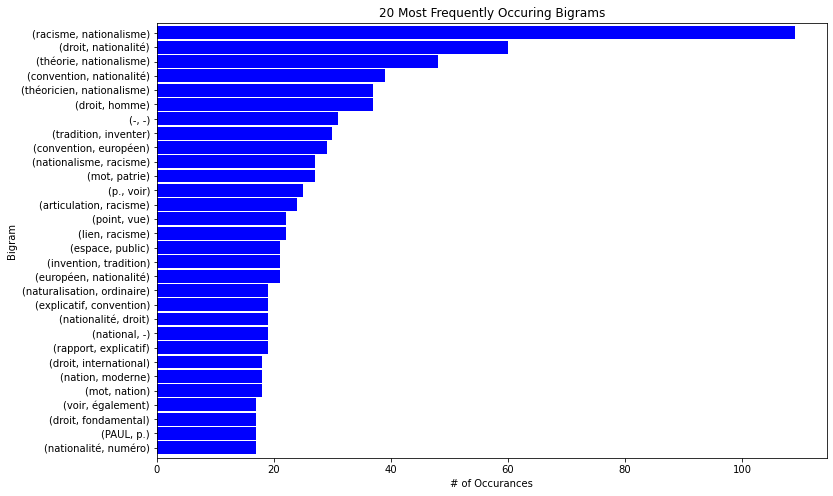

In [24]:
french_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

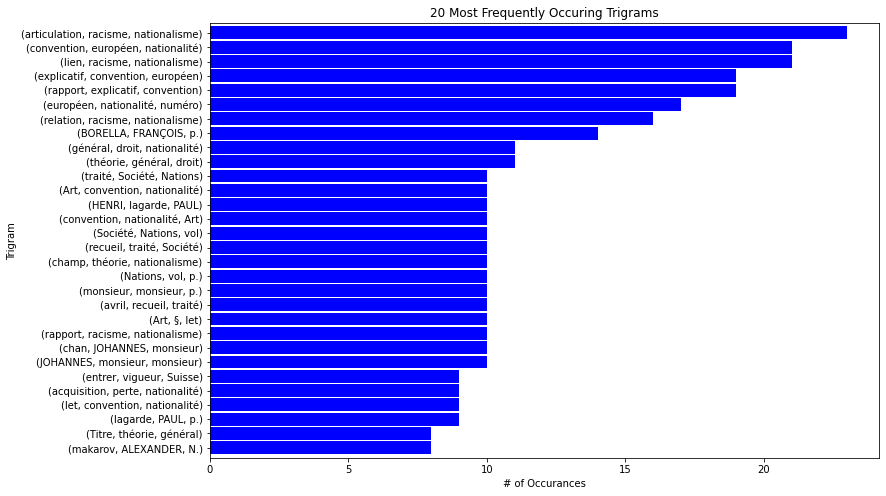

In [25]:
french_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [26]:
german_bigrams = (pd.Series(nltk.ngrams(' '.join(german_txt_sw).split(), 2)).value_counts())[:40]
german_trigrams = (pd.Series(nltk.ngrams(' '.join(german_txt_sw).split(), 3)).value_counts())[:35]

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

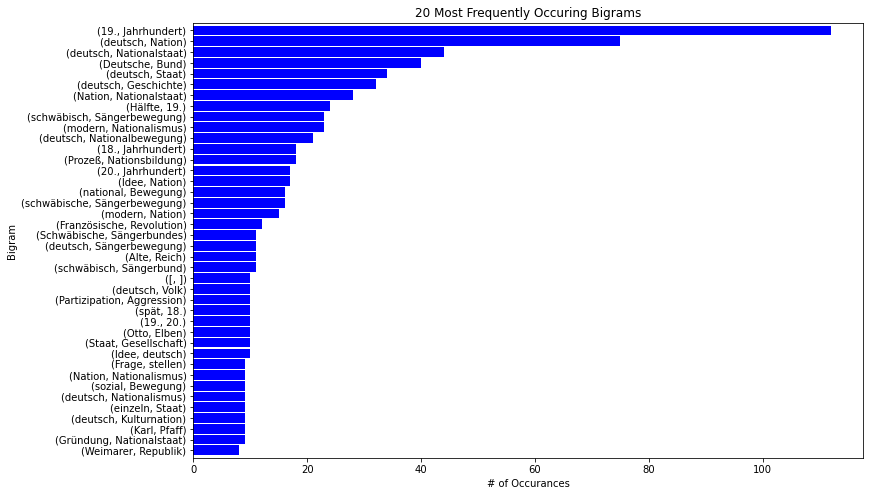

In [27]:
german_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

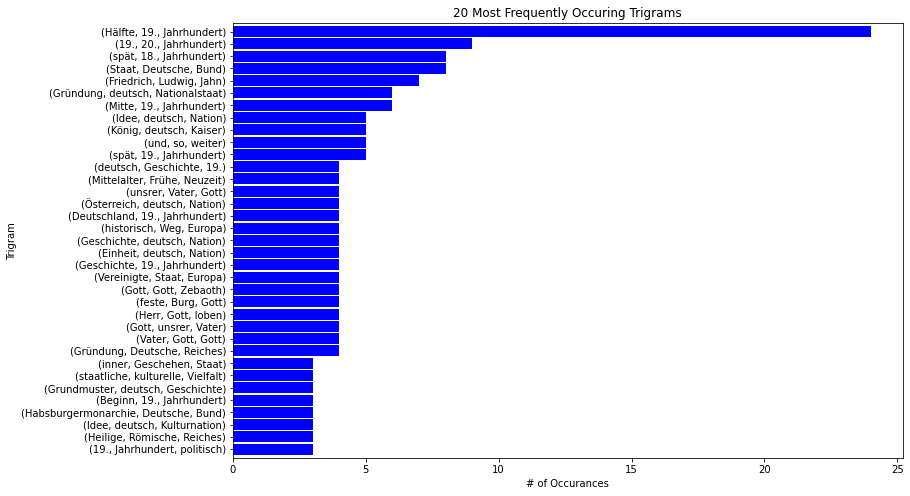

In [28]:
german_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

### Trying out some LDA to get only words related to topic nationality

In [62]:
french_tokens = [tokenizer.tokenize(french) for french in french_txt_sw]
# Create Dictionary
id2word = corpora.Dictionary(french_tokens)
# Create Corpus
texts = french_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 3), (2, 1), (3, 13), (4, 1), (5, 3), (6, 7), (7, 1), (8, 2), (9, 1), (10, 1), (11, 3), (12, 1), (13, 5), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 3)]


In [63]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.002260 -0.001773       1        1  31.054937
0      0.012285 -0.002813       2        1  17.519733
9     -0.003141 -0.002825       3        1  15.691395
4     -0.003967 -0.001567       4        1  14.908020
1      0.003627  0.006630       5        1   8.367262
5     -0.000405 -0.001821       6        1   6.112039
7      0.000502  0.000661       7        1   3.759566
6      0.001562  0.000553       8        1   2.469811
3     -0.001335  0.001765       9        1   0.061276
2     -0.006867  0.001190      10        1   0.055961, topic_info=                Term         Freq        Total Category  logprob  loglift
1703     nationalité  1847.000000  1847.000000  Default  30.0000  30.0000
1706  naturalisation  1691.000000  1691.000000  Default  29.0000  29.0000
4819               I  1257.000000  1257.000000  Default  28.0000  28.0000
318             Voir  1033.000000  1033.000000  Default  27.0000  27.0000
2822            être  1193.000000  1193.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
135               Il     0.416440   890.927022  Topic10  -5.6373  -0.1800
154                L     0.395918   894.099272  Topic10  -5.6878  -0.2341
4821              II     0.357764   711.898578  Topic10  -5.7892  -0.1075
1903            peut     0.386274   965.366692  Topic10  -5.7125  -0.3354
685            comme     0.337443   764.825709  Topic10  -5.8476  -0.2377

[913 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6         1  0.310360     A
6         2  0.185194     A
6         3  0.174977     A
6         4  0.153264     A
6         5  0.056197     A
...     ...       ...   ...
2822      6  0.061179  être
2822      7  0.039389  être
2822      8  0.027656  être
2822      9  0.000838  être
2822     10  0.000838  être

[2957 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 10, 5, 2, 6, 8, 7, 4, 3])

In [60]:
for index, topic in lda_model.show_topics(formatted=False, num_words=40):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['nationalisme', 'nationalité', 'fédéral', 'I', 'naturalisation', 'cette', 'Voir', 'être', 'La', 'En', 'L', 'Il', 'comme', 'Art', 'A', 'racisme', 'peut', 'loi', 'cas', 'droits', 'ATF', 'cantons', 'cons', 'vue', 'procédure', 'Suisse', 'II', 'autres', 'également', 'Dans', 'Les', 'FF', 'Le', 'ainsi', 'conditions', 'Chapitre', 'Tribunal', 'fait', 'décision', 'autorité']
Topic: 1 
Words: ['nationalité', 'être', 'naturalisation', 'La', 'Art', 'nationalisme', 'peut', 'cette', 'En', 'comme', 'I', 'Voir', 'fédéral', 'ATF', 'loi', 'ainsi', 'L', 'cas', 'Cst', 'également', 'cantons', 'Le', 'II', 'entre', 'cons', 'Les', 'FF', 'suisse', 'vue', 'fait', 'Il', 'droits', 'procédure', 'A', 'matière', 'Confédération', 'voir', 'Tribunal', 'mesure', 'autorité']
Topic: 2 
Words: ['nationalité', 'naturalisation', 'I', 'Voir', 'La', 'fédéral', 'En', 'Art', 'être', 'cons', 'cette', 'cas', 'A', 'Les', 'Le', 'FF', 'loi', 'également', 'Il', 'droits', 'cantons', 'Cst', 'L', 'suisse', 'peut', 'ATF',

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
german_tokens = [tokenizer.tokenize(german) for german in german_txt_sw]
# Create Dictionary
id2word = corpora.Dictionary(german_tokens)
# Create Corpus
texts = german_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 3), (14, 1), (15, 2), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.002523  0.003490       1        1  51.174000
1     -0.007533  0.001266       2        1  16.999350
5      0.002297  0.000723       3        1  13.383223
9      0.004377  0.000042       4        1  12.399573
0      0.000561 -0.005268       5        1   3.537280
7      0.001828  0.000829       6        1   2.500572
4      0.000916  0.001055       7        1   0.003541
3     -0.005281 -0.000062       8        1   0.000820
6     -0.000119  0.000149       9        1   0.000820
8      0.000430 -0.002224      10        1   0.000820, topic_info=                Term        Freq       Total Category  logprob  loglift
257              Die  418.000000  418.000000  Default  30.0000  30.0000
887           Nation  290.000000  290.000000  Default  29.0000  29.0000
1630       deutschen  251.000000  251.000000  Default  28.0000  28.0000
2796           wurde  218.000000  218.000000  Default  27.0000  27.0000
895    Nationalismus  204.000000  204.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
259            Diese    0.000554   94.822843  Topic10  -6.5999  -0.3394
6072  Nationsbildung    0.000501   74.984657  Topic10  -6.7000  -0.2049
1029      Revolution    0.000520   85.609281  Topic10  -6.6631  -0.3004
2015           immer    0.000517   84.902350  Topic10  -6.6684  -0.2975
373           Europa    0.000528  133.416690  Topic10  -6.6484  -0.7294

[846 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
6         1  0.281992                30er
6         2  0.281992                30er
6         3  0.281992                30er
6         4  0.281992                30er
9         1  0.541581                60er
...     ...       ...                 ...
2848      1  0.769800  Überfremdungsiniti
2857      1  0.512057         Überzeugung
2857      2  0.170686         Überzeugung
2857      3  0.170686         Überzeugung
2857      4  0.170686         Überzeugung

[1534 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 6, 10, 1, 8, 5, 4, 7, 9])

In [67]:
for index, topic in lda_model.show_topics(formatted=False, num_words=40):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['Die', 'Nation', 'deutschen', 'Der', 'Nationalismus', 'wurde', 'Nationalstaat', 'Europa', 'In', 'Gesellschaft', 'Das', 'Geschichte', 'politischen', 'Deutschen', 'mehr', 'Es', 'Staaten', 'Revolution', 'deutsche', 'Sie', 'jedoch', 'politische', 'Jahrhunderts', 'Schweiz', 'Staat', 'Nationsbildung', 'sei', 'immer', 'konnte', 'Auch', 'Deutschland', 'wurden', 'nationalen', 'nationale', 'Einheit', 'Zeit', 'Jahrhundert', 'Diese', 'politisch', 'denen']
Topic: 1 
Words: ['Die', 'Schweiz', 'wurde', 'Nation', 'deutschen', 'Nationalismus', 'Das', 'In', 'Der', 'Es', 'Nationalstaat', 'Europa', 'mehr', 'wurden', 'Deutschland', 'Diese', 'politischen', 'deutsche', 'Geschichte', 'Sie', 'Nationsbildung', 'immer', 'Staaten', 'sei', 'jedoch', 'Deutschen', 'konnte', 'Gesellschaft', 'politische', 'Auch', 'Welt', 'Als', 'Im', 'Staat', 'schon', 'Er', 'nationalen', 'Jahrhundert', 'Schweizer', 'Jahre']
Topic: 2 
Words: ['Die', 'deutschen', 'Nation', 'wurde', 'Nationalismus', 'Das', 'Nationalstaa

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
